# Classical mechanics numerical project 1

In [239]:
import numpy as np
import matplotlib.pyplot as plt

In [240]:
def RK4(f,x0, t_end, h = 0.1):#,tol = 1E-7, maxiter = 100):
    df = len(x0)
    N = int(t_end/h)
    ts = np.linspace(0,t_end,N)
    xs = np.zeros((N,df))
    xs[0] = x0
    for count, t in enumerate(ts):
        if count == 0:
            continue
        k1 = f(t,xs[count-1])
        k2 = f(t+h/2,xs[count-1]+h*k1/2)
        k3 = f(t+h/2,xs[count-1]+h*k2/2)
        k4 = f(t+h,xs[count-1]+h*k3)
        xs[count] = xs[count-1] + h/6* (k1 +2*k2 + 2*k3 + k4)
    return xs,ts

In [241]:
g = 9.81 #gravitation const, units [L][T]^-2
theta = np.pi/4 #units [1]
parameter1 = 4e-5 #B_2/m, units [L]^-1
parameter2 = 1e4 #k_B T/mg, units [L]^1
a = 6.5e-3 #units [K][L]^-1
alpha= 2.5 #units [1]
rho0 = 1.225 #airdensity at sea level, kg/m^3

In [242]:
t_end = 200
h = 0.1

In [243]:
def projectileDE_noFric(t,x):
    return np.array([x[1],0,x[3],-g])

In [244]:
def projectile_anal_sol(t,x):
    return np.array([x[0] + x[1]*t,x[1],x[2] + x[3]*t - 0.5*g*t**2,x[3]-g*t])

In [245]:
def IC_from_angle(theta):
    return np.array([0,700*np.cos(theta),0,700*np.sin(theta)])

In [246]:
x0 = IC_from_angle(theta)

Numerical sol:

In [247]:
xs_num,ts_num = RK4(projectileDE_noFric,x0,t_end,h)

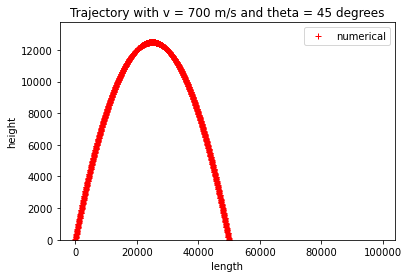

In [248]:
plt.title("Trajectory with v = 700 m/s and theta = 45 degrees")
plt.xlabel("length")
plt.ylabel("height")
plt.plot(xs_num[:,0],xs_num[:,2], "+",color = "red", label = "numerical", lw = 0.1)
plt.ylim(0,1.1*max(xs_anal[:,2]))
plt.legend()

Analytical sol:

In [249]:
df = len(x0)
N = int(t_end/h)
ts = np.arange(0,t_end,h)
xs_anal = np.array([projectile_anal_sol(t,x0) for t in ts])

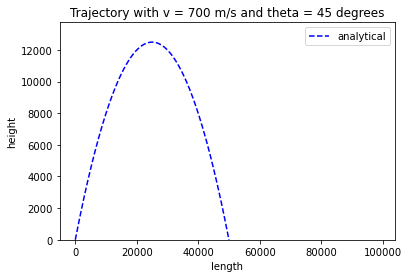

In [250]:
plt.title("Trajectory with v = 700 m/s and theta = 45 degrees")
plt.xlabel("length")
plt.ylabel("height")
plt.plot(xs_anal[:,0],xs_anal[:,2], "--", label = "analytical", color = "blue")
plt.ylim(0,1.1*max(xs_anal[:,2]))
plt.legend()

Plotting in the same plot

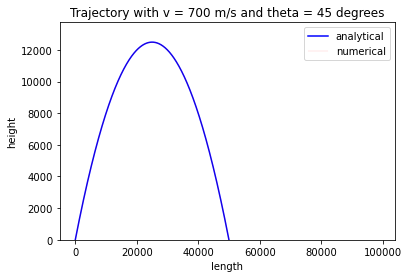

In [251]:
plt.title("Trajectory with v = 700 m/s and theta = 45 degrees")
plt.xlabel("length")
plt.ylabel("height")
plt.plot(xs_anal[:,0],xs_anal[:,2], label = "analytical", color = "blue")
plt.plot(xs_num[:,0],xs_num[:,2] ,color = "red", label = "numerical", lw = 0.1)
plt.ylim(0,1.1*max(xs_anal[:,2]))
plt.legend()


In [252]:
xs_diff = xs_num - xs_anal

##### 1.b)

Angles and inital conditions for the three cases of friction:

In [253]:
M = 50
angles = np.linspace(0,np.pi/2,M)
ICs = np.array([IC_from_angle(angle) for angle in angles])

##### The constant air density model

In [254]:
def projectileDE_Fric_const(t,x):
    Fdrag_x = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[1]
    Fdrag_y = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[3]
    return np.array([x[1],Fdrag_x,x[3],-g + Fdrag_y])

In [255]:
xs_nums_const = np.zeros(shape = [M,N,df])
max_x_const, angle_const = 0, None

for count,IC in enumerate(ICs):
    xs_nums_const[count],ts_num = RK4(projectileDE_Fric_const,IC,t_end,h)
    
    landed = False
    for t in range(len(xs_nums_const[count,:,0])):
        if not landed and xs_nums_const[count,t,2] < 0:
            landed = True
            x_landed = xs_nums_const[count,t,0]
    
    if max_x_const < x_landed:
        max_x_const = x_landed
        angle_const = angles[count]

The longest shot is 2.21e+04 meters, and the corresponding_angle is 0.67


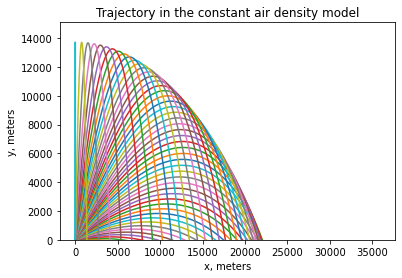

In [256]:
plt.title("Trajectory in the constant air density model")
plt.xlabel("x, meters")
plt.ylabel("y, meters")
for i in range(len(xs_nums_const)):
    plt.plot(xs_nums_const[i,:,0], xs_nums_const[i,:,2])
plt.ylim(0,1.1*max(xs_nums_const[i,:,2]))
print(f"The longest shot is {max_x_const:.2e} meters, and the corresponding_angle is {angle_const:.2f}")

##### The isothermal model

In [257]:
def isothermal_rho(height):
    return rho0*np.exp(-height/parameter2)

def projectileDE_Fric_iso(t,x):
    Fdrag_x = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[1] *isothermal_rho(x[2])/rho0
    Fdrag_y = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[3] *isothermal_rho(x[2])/rho0
    return np.array([x[1],Fdrag_x,x[3],-g + Fdrag_y])

In [258]:
xs_nums_iso = np.zeros(shape = [M,N,df])
max_x_iso, angle_iso = 0, None

for count,IC in enumerate(ICs):
    xs_nums_iso[count],ts_num = RK4(projectileDE_Fric_iso,IC,t_end,h)
    
    landed = False
    for t in range(len(xs_nums_iso[count,:,0])):
        if not landed and xs_nums_iso[count,t,2] < 0:
            landed = True
            x_landing = xs_nums_iso[count,t,0]
        
    if max_x_iso < x_landing:
        max_x_iso = x_landing
        angle_iso = angles[count]

The longest shot is 2.66e+04 meters, and the corresponding_angle is 0.80


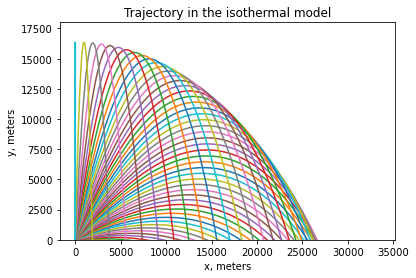

In [259]:
plt.title("Trajectory in the isothermal model")
plt.xlabel("x, meters")
plt.ylabel("y, meters")
for i in range(len(xs_nums_iso)):
    plt.plot(xs_nums_iso[i,:,0], xs_nums_iso[i,:,2])
plt.ylim(0,1.1*max(xs_nums_iso[i,:,2]))
print(f"The longest shot is {max_x_iso:.2e} meters, and the corresponding_angle is {angle_iso:.2f}")

##### The abiabatic model

In [260]:
def adiabatic_rho(height,T0 = 298): #298 is 25 degrees
    return rho0*(1 - a * height/T0)**alpha

def projectileDE_Fric_adia(t,x):
    Fdrag_x = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[1] *adiabatic_rho(x[2])/rho0
    Fdrag_y = -parameter1*np.sqrt(x[1]**2 + x[3]**2)*x[3] *adiabatic_rho(x[2])/rho0
    return np.array([x[1],Fdrag_x,x[3],-g + Fdrag_y])

In [261]:
xs_nums_adia = np.zeros(shape = [M,N,df])
max_x_adia, angle_adia = 0, None

for count,IC in enumerate(ICs):
    xs_nums_adia[count],ts_num = RK4(projectileDE_Fric_adia,IC,t_end,h)
    
    landed = 0, False
    for t in range(len(xs_nums_adia[count,:,0])):
        if not landed and xs_nums_adia[count,t,2] < 0:
            landed = True
            x_landing = xs_nums_adia[count,t,0]
            
    
    if max_x_adia < x_landing:
        max_x_adia = x_landing
        angle_adia = angles[count]
    

The longest shot is 3.59e-12 meters, and the corresponding_angle is 0.00


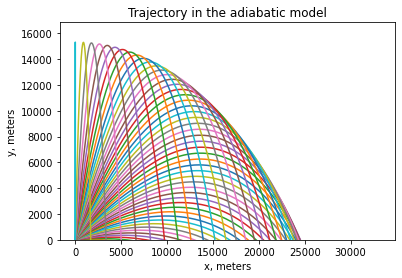

In [262]:
plt.title("Trajectory in the adiabatic model")
plt.xlabel("x, meters")
plt.ylabel("y, meters")
for i in range(len(xs_nums_adia)):
    plt.plot(xs_nums_adia[i,:,0], xs_nums_adia[i,:,2])
plt.ylim(0,1.1*max(xs_nums_adia[i,:,2]))
print(f"The longest shot is {max_x_adia:.2e} meters, and the corresponding_angle is {angle_adia:.2f}")

##### 2)

We define the function IC_from_angle_2 which return the initial condition for the initial velocity of 1640 m/s given the angle of the Paris gun.

In [263]:
def IC_from_angle_2(theta):
    return np.array([0,1640*np.cos(theta),0,1640*np.sin(theta)])

As the friction is only a fucntion of height, we only need to calculate for the angle $\theta \in [0, \frac{\pi}{2}]$, where $\theta = \frac{\pi}{2}$ means straight up and $\theta = 0$ means horisontaly. 

In [264]:
M = 50
angles = np.linspace(0,np.pi/2,M)
ICs = np.array([IC_from_angle_2(angle) for angle in angles])

In [265]:
xs_nums_paris = np.zeros(shape = [M,N,df])
max_x_paris, angle_x_paris = 0, None
max_y_paris, angle_y_paris = 0, None
max_airtime = 0
for count,IC in enumerate(ICs):
    xs_nums_paris[count],ts_num = RK4(projectileDE_Fric_adia,IC,t_end,h)
    t_landing, landed = 0, False
    for t in range(len(xs_nums_paris[count,:,0])):
        if not landed and xs_nums_paris[count,t,2] < 0:
            landed = True
            t_landed = ts_num[t]
            x_landing = xs_nums_paris[count,t,0]
    if max_airtime < t_landed:
        max_airtime = t_landed
        angle_max_air = angles[count]
    if max_x_paris < x_landing:
        max_x_paris = x_landing
        angle_x_paris = angles[count]
    if max_y_paris < max(xs_nums_paris[count,:,2]):
        max_y_paris = max(xs_nums_paris[count,:,2])
        angle_y_paris = angles[count]

<ipython-input-260-0eb0e2e2b63f>:2: RuntimeWarning: invalid value encountered in double_scalars
  return rho0*(1 - a * height/T0)**alpha


The longest shot is 7.91e+04 meters, and the corresponding_angle is 0.96
The highest shot is 4.59e+04 meters, and the corresponding_angle is 1.54
The longest airtime is 1.92e+02 sec, and the corresponding_angle is 1.15


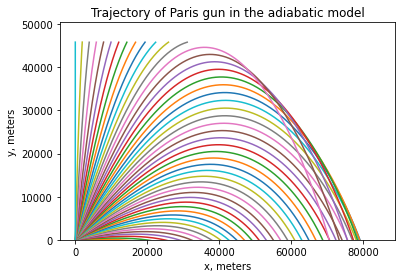

In [266]:
plt.title("Trajectory of Paris gun in the adiabatic model")
plt.xlabel("x, meters")
plt.ylabel("y, meters")
for i in range(len(xs_nums_paris)):
    plt.plot(xs_nums_paris[i,:,0], xs_nums_paris[i,:,2])
plt.ylim(0,1.1*max(xs_nums_paris[i,:,2]))
print(f"The longest shot is {max_x_paris:.2e} meters, and the corresponding_angle is {angle_x_paris:.2f}")
print(f"The highest shot is {max_y_paris:.2e} meters, and the corresponding_angle is {angle_y_paris:.2f}")
print(f"The longest airtime is {max_airtime:.2e} sec, and the corresponding_angle is {angle_max_air:.2f}")


Important remark: This results holds when the adiabatic model i assumed correct, for the values which is computed. These are not for all values, as the angles to close to vertical firing gives a height so high that the formula for the adiabatic density gets imaginary by rooting a negative number. The model is therefore at this height obviously wrong, but that is a queston for another time. 